# 멕시코식당 주문 CHIPOTLE
##### 1. 탐색 : 기본정보 살펴보기
- 데이터셋의 기본 정보 
- 데이터셋의 행과열, 데이터
- 데이터셋의 수치적 특징 파악



- tsv 셀구분 \t tab 구분 sep = \t설정

In [59]:
import pandas as pd
df = pd.read_csv('chipotle.tsv', sep ='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [60]:
df.shape

(4622, 5)

In [61]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [62]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [63]:
df.index

RangeIndex(start=0, stop=4622, step=1)

## 수치적 특징 파악

In [64]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [65]:
# df['order_id'] = str(df['order_id'])
df['order_id'] = df['order_id'].astype(str)

In [66]:
df.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [67]:
# item_name 종류 출력하기
df['item_name'].unique()
print(len(df['item_name'].unique()))

50


탐색과 시각화

In [68]:
# item별 주문 수량 조회 가장많이 주문 top10개 출력
df['item_name'].value_counts()[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [69]:
# 아이템당 주문 갯수 조회
print(df.groupby('item_name')['order_id'].count())

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [70]:
print(df['order_id'].unique())
print(len(df['order_id'].unique()))

['1' '2' '3' ... '1832' '1833' '1834']
1834


In [71]:
print(df['order_id'].tail())

4617    1833
4618    1833
4619    1834
4620    1834
4621    1834
Name: order_id, dtype: object


In [72]:
# 간단한 시각화
# item당 주문 개수를 시각화로 출력하기
import matplotlib.pyplot as plt
order_count =df.groupby('item_name')['order_id'].count()
order_count = order_count.sort_values(ascending=False)
print(order_count)


item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


<ipython-input-73-e44d12771461>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(item_name_list, rotation = 45)


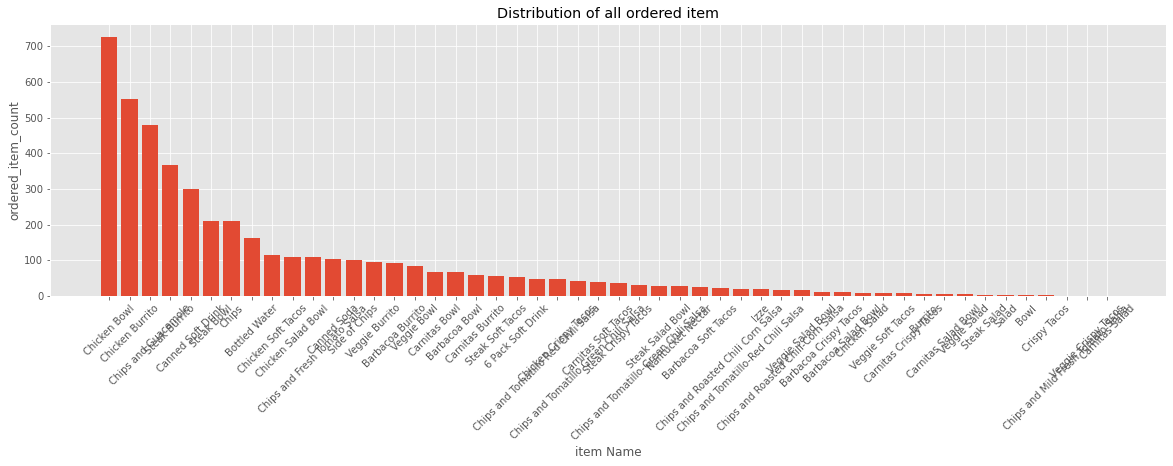

In [73]:
item_name_list = order_count.index.tolist()
order_cnt = order_count.values.tolist()
plt.style.use('ggplot')
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1)
ax.bar(item_name_list, order_cnt, align = 'center')
plt.ylabel('ordered_item_count')
plt.xlabel('item Name')
ax.set_xticklabels(item_name_list, rotation = 45)
plt.title('Distribution of all ordered item')
plt.show()

<ipython-input-74-361a9ec3ac91>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(item_name_list, rotation = 45)


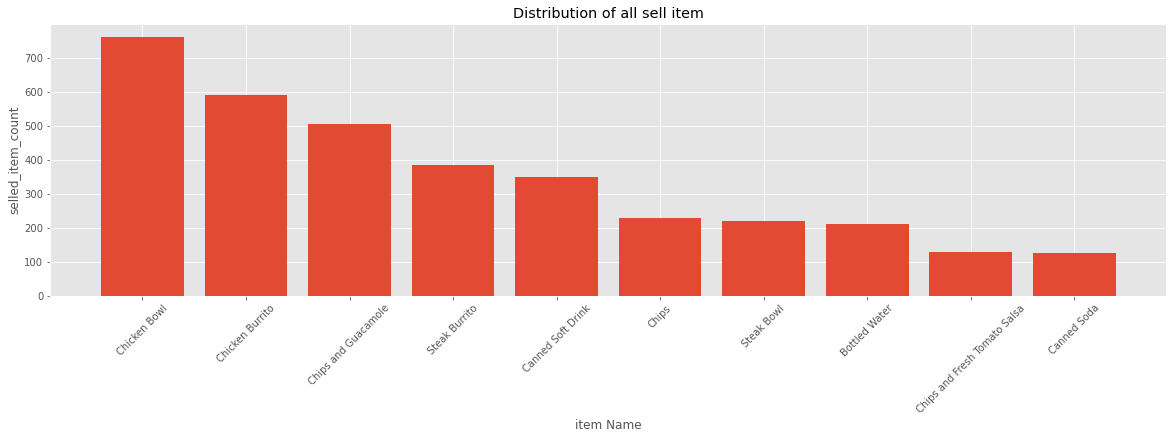

In [74]:
item_qty = df.groupby('item_name')['quantity'].sum()
item_qty = item_qty.sort_values(ascending=False)[:10]

item_name_list = item_qty.index.tolist()
sell_cnt = item_qty.values.tolist()


plt.style.use('ggplot')
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1)

ax.bar(item_name_list, sell_cnt, align = 'center')
plt.ylabel('selled_item_count')
plt.xlabel('item Name')
ax.set_xticklabels(item_name_list, rotation = 45)
plt.title('Distribution of all sell item')
plt.show()

In [75]:
df['item_price']

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [76]:
# 숫자형으로 바꾸려면

df['item_price'] = df['item_price'].apply(lambda x : float(x[1:]))
df['item_price'

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [77]:
df['item_price'].describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

In [78]:
# 주문당 평균 계산금액
df[['order_id','item_price']].head()

,order_id,item_price
0,1,2.39
1,1,3.39
2,1,3.39
3,1,2.39
4,2,16.98


In [82]:
df.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [83]:
df.groupby('order_id')['item_price'].sum().describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

In [84]:
order_group_tot = df.groupby('order_id').sum()
order_group_tot

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [85]:
results = order_group_tot[order_group_tot.item_price >= 50]
results

,quantity,item_price
order_id,,
1006,8,71.40
1051,7,59.35
1360,6,52.18
1443,35,160.74
1449,11,95.39
1454,10,85.24
1483,14,139.00
1559,16,82.44
1586,6,51.20


In [88]:
print(results.index.values)

['1006' '1051' '1360' '1443' '1449' '1454' '1483' '1559' '1586' '1660'
 '1764' '1786' '1825' '195' '205' '343' '488' '491' '511' '561' '577'
 '691' '759' '818' '848' '916' '926' '953']


In [89]:
df[df['order_id'] == '1006']

,order_id,quantity,item_name,choice_description,item_price
2529,1006,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Sour Cream, Lettuce]]",8.75
2530,1006,1,Veggie Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.25
2531,1006,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",9.25
2532,1006,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",11.25
2533,1006,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
2534,1006,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2535,1006,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.25
2536,1006,1,Chips,NaN,2.15


In [90]:
df.loc[df['order_id'].isin(results.index.values)]

,order_id,quantity,item_name,choice_description,item_price
448,195,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",8.75
449,195,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
450,195,1,Barbacoa Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.75
451,195,1,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
452,195,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.25
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4592,1825,1,Barbacoa Burrito,"[Tomatillo Red Chili Salsa, [Rice, Fajita Vege...",11.75
4593,1825,1,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Rice, Sour Cream, ...",11.75


- 6명이 해야할 것,
- 마스크 살수있는 것
- 세부적으로, 화장실 위치, 
- 내가 정말 필요할까?, 
- 출산율이 떨어지니깐 각지역별 출산율 > 각정보가지고 분석
- 왜 특이점이 생겼는가? 하나가 아니라 관련된 것 모두 가져오기
- 얼굴인식, 딥러닝

In [91]:
# 각 단가 구하기
item_two_price = df[df.quantity == 2]
item_two_price[['quantity','item_name','item_price']]

,quantity,item_name,item_price
4,2,Chicken Bowl,16.98
18,2,Canned Soda,2.18
51,2,Canned Soda,2.18
135,2,Chicken Salad Bowl,22.50
148,2,Steak Burrito,17.98
...,...,...,...
4435,2,Chicken Bowl,17.50
4499,2,Canned Soft Drink,2.50
4560,2,Canned Soft Drink,2.50
4561,2,Chicken Salad Bowl,17.50


In [92]:
price_one_item  = df.groupby('item_name').min()
price_one_item = price_one_item['item_price']
price_one_item

item_name
6 Pack Soft Drink                        6.49
Barbacoa Bowl                            8.69
Barbacoa Burrito                         8.69
Barbacoa Crispy Tacos                    8.99
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Bottled Water                            1.09
Bowl                                     7.40
Burrito                                  7.40
Canned Soda                              1.09
Canned Soft Drink                        1.25
Carnitas Bowl                            8.99
Carnitas Burrito                         8.69
Carnitas Crispy Tacos                    8.99
Carnitas Salad                           8.99
Carnitas Salad Bowl                      9.39
Carnitas Soft Tacos                      8.99
Chicken Bowl                             8.19
Chicken Burrito                          8.19
Chicken Crispy Tacos                     8.49
Chicken Salad                            8.19
Chicken Salad Bowl      

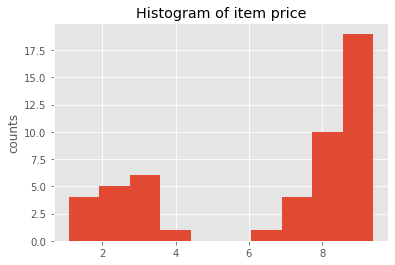

In [94]:
plt.hist(price_one_item)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

In [95]:
price_top10 = price_one_item.sort_values(ascending = False)
price_top10

item_name
Carnitas Salad Bowl                      9.39
Steak Salad Bowl                         9.39
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Carnitas Salad                           8.99
Carnitas Crispy Tacos                    8.99
Steak Soft Tacos                         8.99
Carnitas Bowl                            8.99
Carnitas Soft Tacos                      8.99
Barbacoa Crispy Tacos                    8.99
Veggie Salad Bowl                        8.75
Chicken Salad Bowl                       8.75
Carnitas Burrito                         8.69
Barbacoa Burrito                         8.69
Barbacoa Bowl                            8.69
Steak Bowl                               8.69
Steak Burrito                            8.69
Steak Salad                              8.69
Steak Crispy Tacos                       8.69
Veggie Soft Tacos                        8.49
Chicken Crispy Tacos                     8.49
Veggie Bowl             

In [96]:
df.groupby('order_id').sum()["item_price"].sort_values(ascending = False)[:5]


order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
Name: item_price, dtype: float64

In [99]:
df.groupby('order_id').sum()["item_price"].sort_values(by="item_price",ascending = False)[:5]


TypeError: sort_values() got an unexpected keyword argument 'by'

In [102]:
result1 = df.groupby('order_id').sum()
result2 = result1['item_price']
df.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False)[:5]
result1 = df.groupby('order_id').sum()
result2 = result1.sort_values(by="item_price",ascending = False)
df.groupby('order_id').sum().sort_values(by = 'quantity', ascending = False)[:10]

,quantity,item_price
order_id,,
1443,35,160.74
926,23,205.25
1786,20,114.30
1660,19,70.25
759,18,86.30
511,17,104.59
1559,16,82.44
1483,14,139.00
205,12,109.90


In [109]:
df_salad = df[df['item_name'] == 'Veggie Salad Bowl']
df_salad['item_name']
df_salad.groupby('order_id').sum()
print(len(df_salad.groupby('order_id').sum()))

18


In [111]:
df_salad.groupby('order_id').sum().shape[0]

18

In [113]:
df_salad = df_salad.drop_duplicates(['item_name', 'order_id'])
print(len(df_salad))

18
